# CE442 Lab Assignment 2
Muhammad Ahabb Sheraz<br>
2021327

In [1]:
!pip install sympy

Defaulting to user installation because normal site-packages is not writeable


Task 1

In [10]:
from sympy import diff, symbols, cos

x = symbols('x')

dif = diff(cos(x), x, 2)

In [11]:
dif

-cos(x)

In [15]:
from sympy import lambdify

# Create the lambda function using lambdify
f = lambdify(x, dif, modules=["math"])

print(f(90))

0.4480736161291701


Task 2

In [17]:
from sympy import diff, factorial

def taylor_expansion(f, a, n_terms):
    taylor = 0
    for n in range(n_terms):
        f_n = diff(f, x, n)
        f_n_at_a = f_n.subs(x, a)
        taylor += (f_n_at_a / factorial(n)) * (x - a)**n
    return taylor



In [23]:
import math

def mac_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

In [24]:
out = mac_cos(math.radians(90),5)
print(out)

2.473727636469452e-05


Order 0: Error at x = 1.5
0.0707372016677029
Order 2: Error at x = 1.5
0.19573720166770292
Order 4: Error at x = 1.5
0.0006200141677029092
Order 6: Error at x = 1.5
2.675507944222e-07


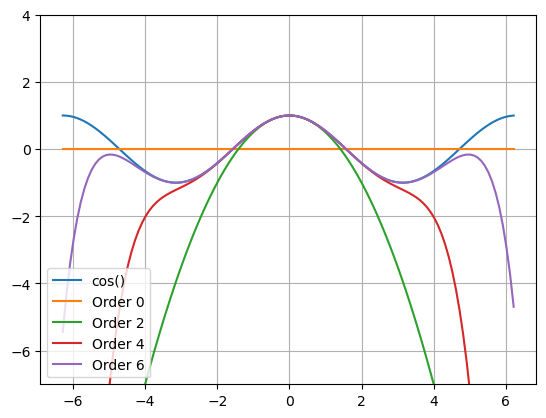

In [40]:
import numpy as np
import matplotlib.pyplot as plt

orders = [0, 2, 4, 6]

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)

plt.plot(angles,p_cos)

# add lines for between 1 and 6 terms in the Taylor Series
for i in orders:
    t_cos = [mac_cos(angle,i) for angle in angles]
    print(f"Order {i}: Error at x = 1.5")
    print(abs(mac_cos(1.5, i)- np.cos(1.5)))
    plt.plot(angles,t_cos)

# set up legend
legend_lst = ['cos()']
for i in orders:
    legend_lst.append(f'Order {i}')
plt.legend(legend_lst, loc=3)

plt.ylim([-7,4])
plt.grid()
plt.show()

Task 3

In [37]:
def f(x):
    return pow(x, 3) - x -1

a, b = 1, 2
tolerance = 0.01

def bisection(f, a, b, tolerance):
    while (b - a)/2 > tolerance:
        c = (a + b)/2
        if f(c) == 0:
            return c
        if f(c)*f(a) < 0:
            b = c
        else:
            a = c
            
    return (a + b)/2

In [39]:
print(f"Root of function: {bisection(f, a, b, tolerance)}")

Root of function: 1.3203125
